# Simple Liner Regressions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
link = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'

df = pd.read_csv(link)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
features = ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
           'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
           'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
for el in features:
    print(f'==============================={el}=============================')
    print(df[el].value_counts(dropna=False))
    

===============================MODELYEAR=============================
2014    1067
Name: MODELYEAR, dtype: int64
===============================MAKE=============================
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
TOYOTA           49
AUDI             49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: MAKE, dtype: int64
=================

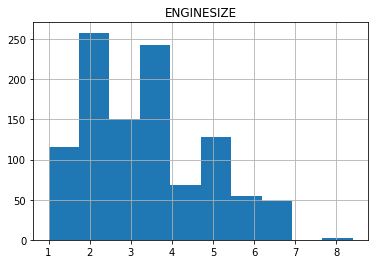

In [8]:
el = ['ENGINESIZE']
el = df[el]
el.hist()
plt.show()

===============================MODELYEAR=============================


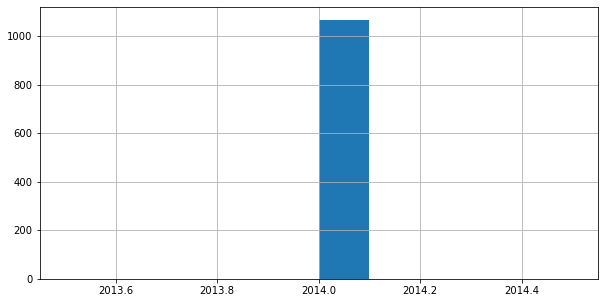


===============================MAKE=============================


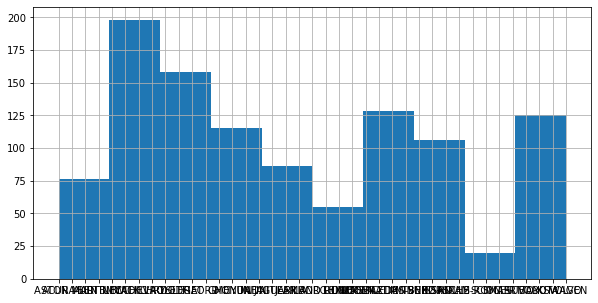


===============================MODEL=============================


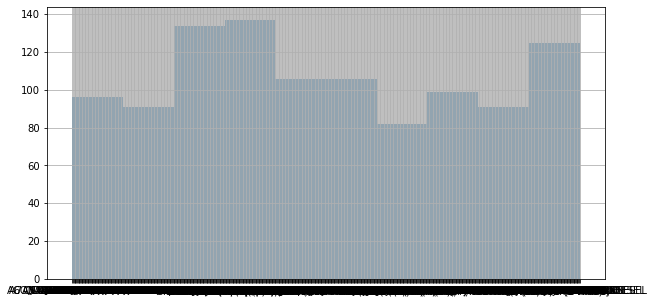


===============================VEHICLECLASS=============================


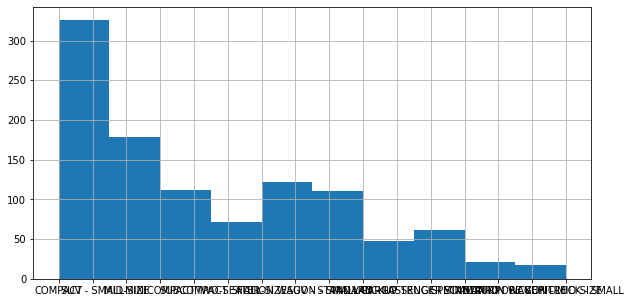


===============================ENGINESIZE=============================


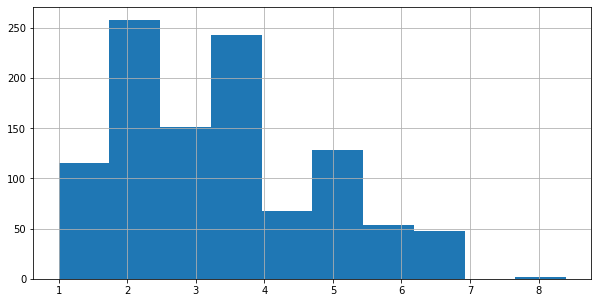


===============================CYLINDERS=============================


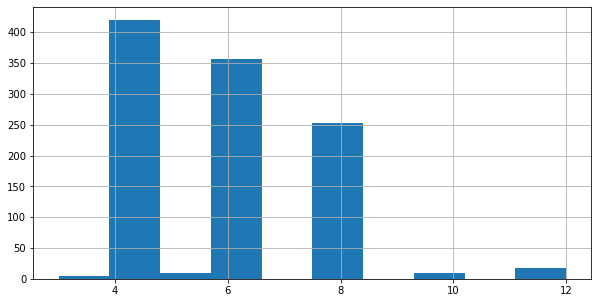


===============================TRANSMISSION=============================


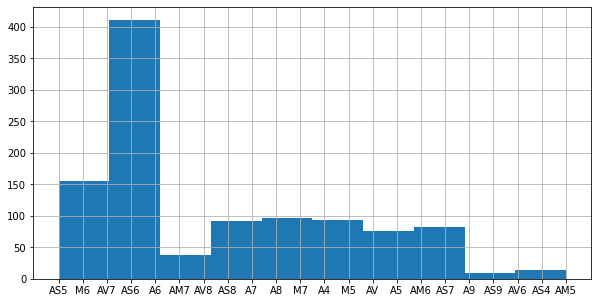


===============================FUELTYPE=============================


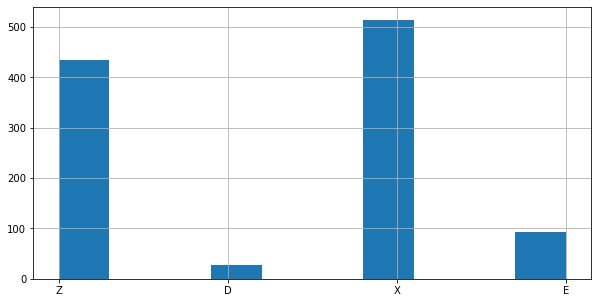


===============================FUELCONSUMPTION_CITY=============================


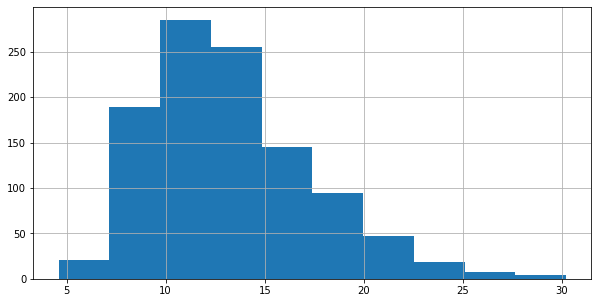


===============================FUELCONSUMPTION_HWY=============================


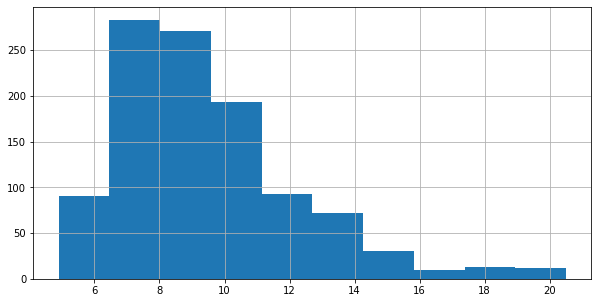


===============================FUELCONSUMPTION_COMB=============================


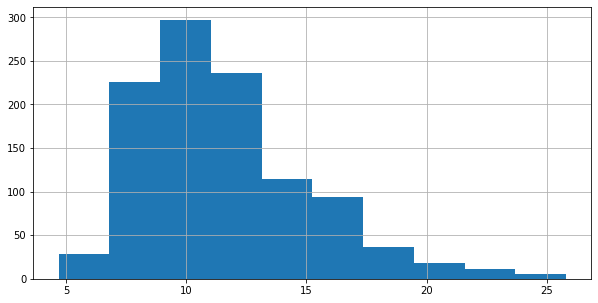


===============================FUELCONSUMPTION_COMB_MPG=============================


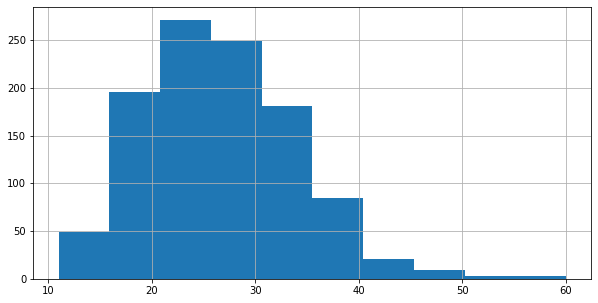


===============================CO2EMISSIONS=============================


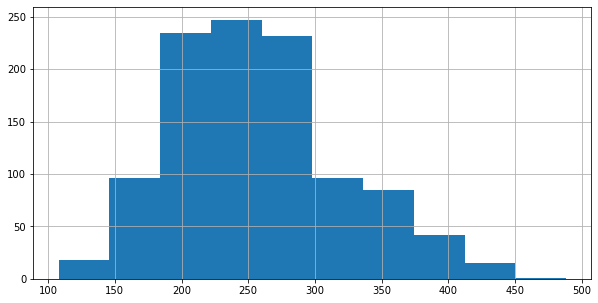

In [9]:
features = ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
           'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
           'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

for el in features:
    try:
        print(f'==============================={el}=============================')
        el = df[el]
        plt.figure(figsize=(10,5))
        el.hist()
        plt.show()
        print('')
    except:
        pass

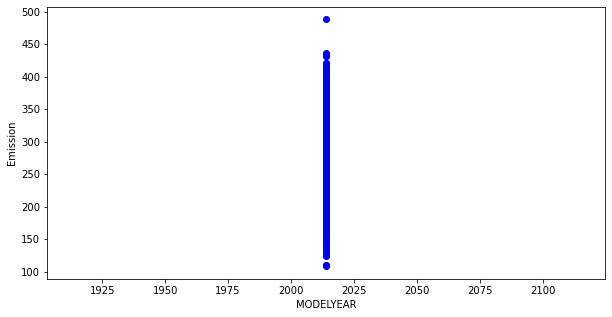

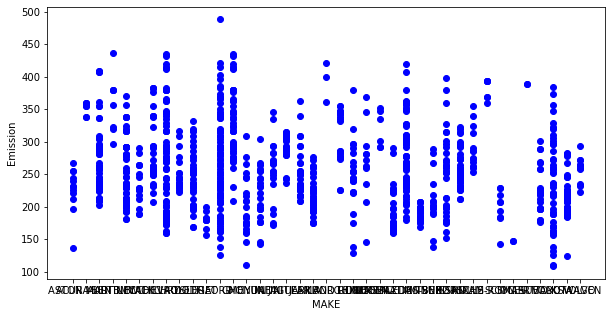

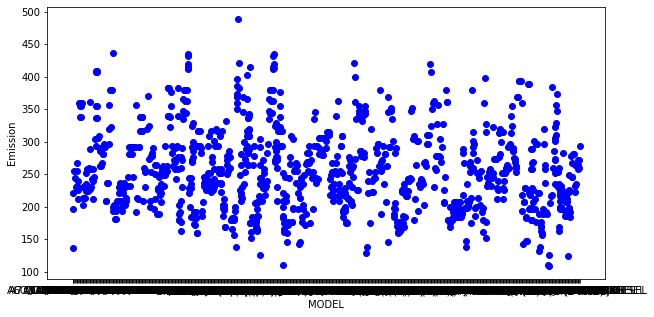

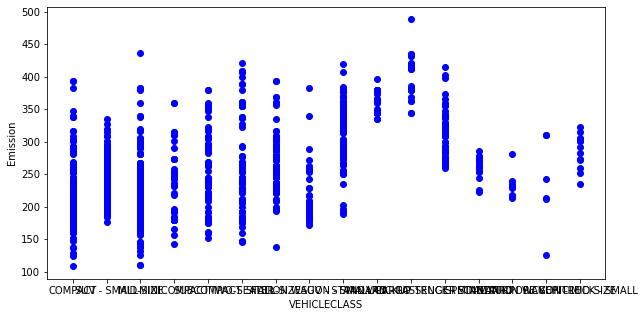

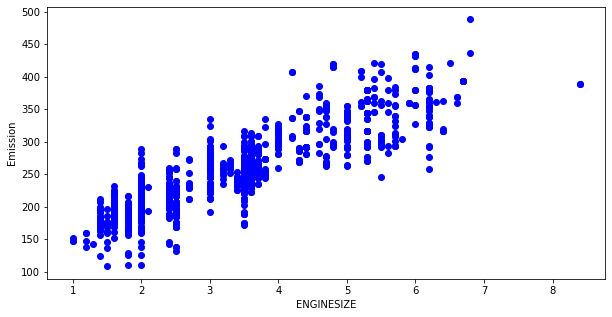

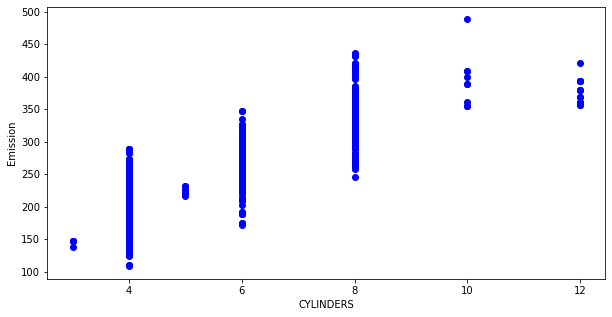

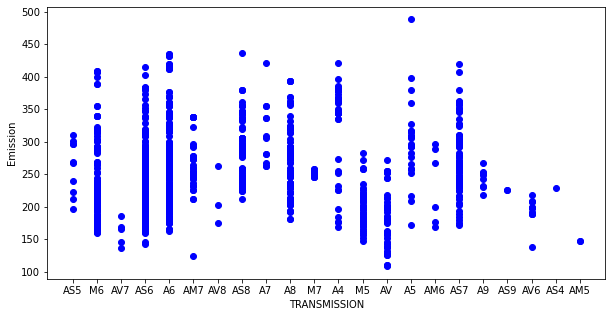

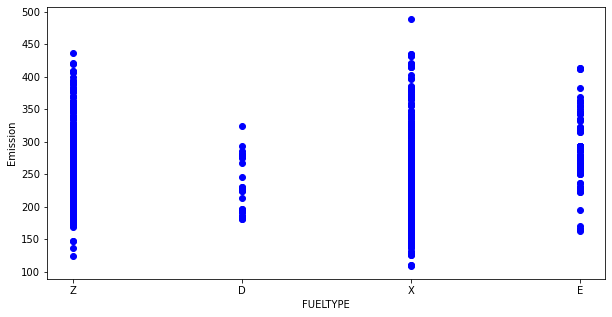

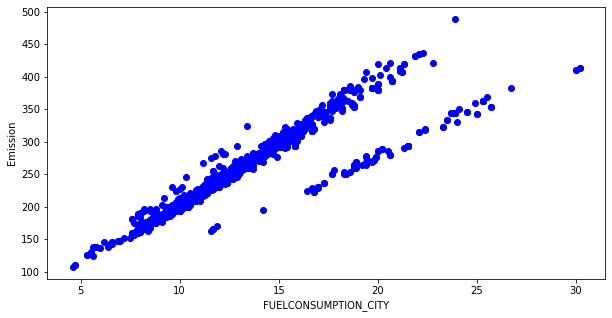

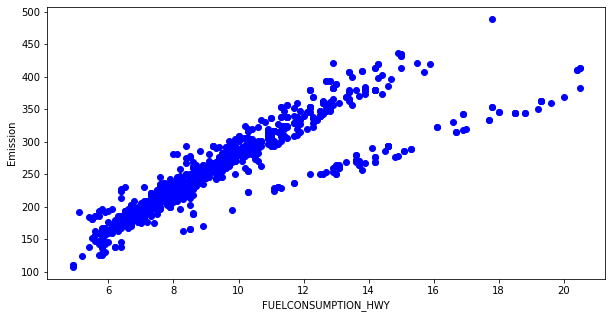

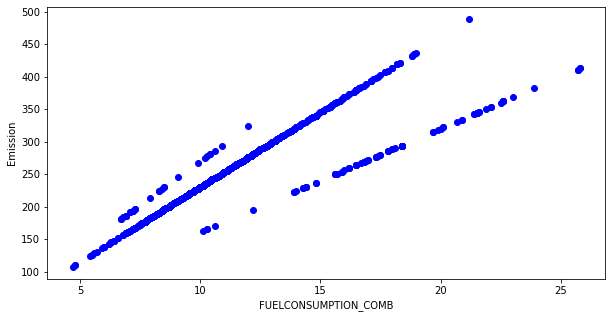

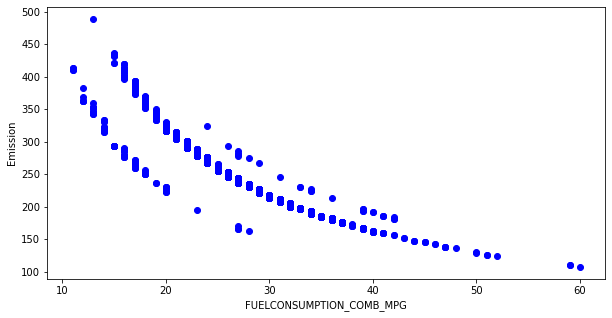

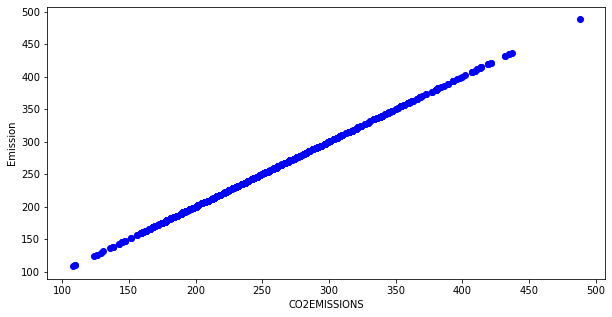

In [10]:
features = ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
           'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
           'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

for el in features:
    print(f'')
    label = el
    el = df[el]
    plt.figure(figsize=(10,5))
    plt.scatter(el, df.CO2EMISSIONS,  color='blue')
    plt.xlabel(label)
    plt.ylabel("Emission")
    plt.show()
    print('')

# Simple Liner Regressions

In [11]:
slr_df = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
slr_df.head(2)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6


In [12]:
msk = np.random.rand(len(slr_df)) < 0.8
print(len(msk))
train = slr_df[msk]
test = slr_df[~msk]

1067


In [13]:
train.shape

(828, 4)

### ENGINESIZE

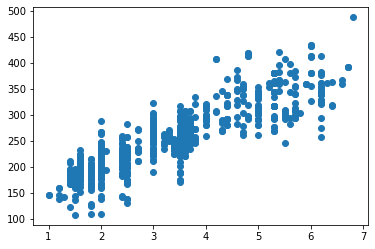

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

In [15]:
test.shape

(239, 4)

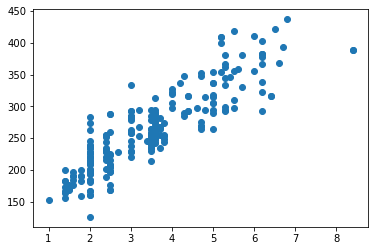

In [16]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS)

In [17]:
from sklearn import linear_model

sl_regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

sl_regr.fit(train_x, train_y)

print(f'Coefficients: {sl_regr.coef_}')
print(f'Interception: {sl_regr.intercept_}')

Coefficients: [[39.43702559]]
Interception: [123.82316362]


### plot

Text(0, 0.5, 'Emission')

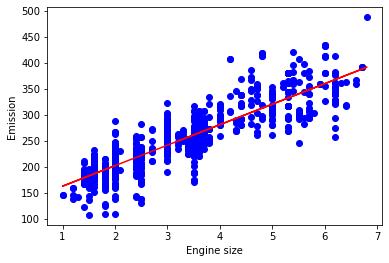

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, sl_regr.coef_[0][0]*train_x + sl_regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluations

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

<ul>
    <li> <b>Mean absolute error:</b> It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> <b>Mean Squared Error (MSE):</b> Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> <b>Root Mean Squared Error (RMSE):</b> This is the square root of the Mean Square Error. </li>
    <li> <b>R-squared</b> is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>



In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat = sl_regr.predict(test_x)

MAE = np.mean(np.absolute(test_y_hat - test_y))
MSE = np.mean((test_y_hat - test_y) ** 2)
R2 = r2_score(test_y_hat , test_y)
score = sl_regr.score(test_x, test_y)

print(f'Mean absolute error: {MAE}')
print(f'Residual sum of squares: {MSE}')
print(f'R2-score: {R2}')
print(f'Variance score: {score}')

Mean absolute error: 23.36147820672936
Residual sum of squares: 907.3056078364658
R2-score: 0.7212731557569677
Variance score: 0.7683484190164579


### CYLINDERS

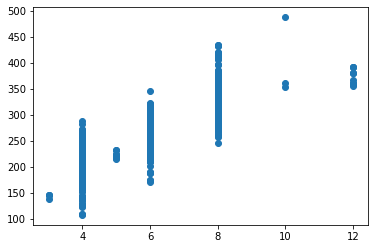

In [20]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS)

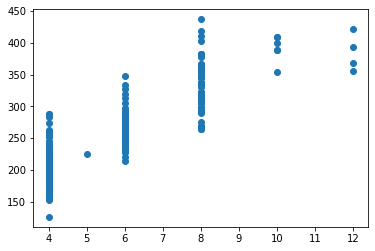

In [21]:
plt.scatter(test.CYLINDERS, test.CO2EMISSIONS)

In [22]:
sl_regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

sl_regr.fit(train_x, train_y)

print(f'Coefficients: {sl_regr.coef_}')
print(f'Interception: {sl_regr.intercept_}')

Coefficients: [[30.16481484]]
Interception: [80.45792613]


Text(0, 0.5, 'Emission')

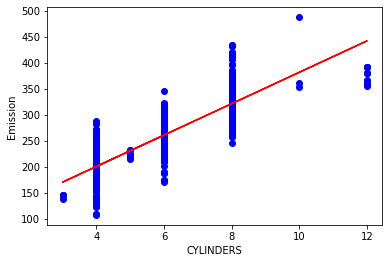

In [23]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, sl_regr.coef_[0][0]*train_x + sl_regr.intercept_[0], '-r')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

In [24]:
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat = sl_regr.predict(test_x)

MAE = np.mean(np.absolute(test_y_hat - test_y))
MSE = np.mean((test_y_hat - test_y) ** 2)
R2 = r2_score(test_y_hat , test_y)
score = sl_regr.score(test_x, test_y)

print(f'Mean absolute error: {MAE}')
print(f'Residual sum of squares: {MSE}')
print(f'R2-score: {R2}')
print(f'Variance score: {score}')

Mean absolute error: 25.21870665016344
Residual sum of squares: 1089.9886185932335
R2-score: 0.6436815511351168
Variance score: 0.7217061323435574


### FUELCONSUMPTION_COMB

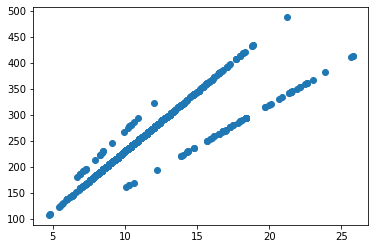

In [25]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS)

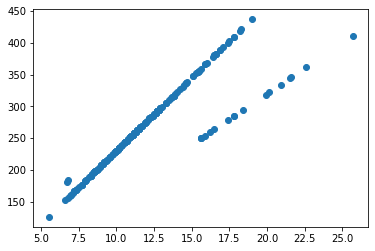

In [26]:
plt.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS)

In [27]:
sl_regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

sl_regr.fit(train_x, train_y)

print(f'Coefficients: {sl_regr.coef_}')
print(f'Interception: {sl_regr.intercept_}')

Coefficients: [[16.04976827]]
Interception: [69.52044973]


Text(0, 0.5, 'Emission')

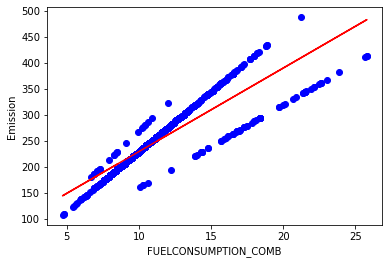

In [28]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, sl_regr.coef_[0][0]*train_x + sl_regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [29]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat = sl_regr.predict(test_x)

MAE = np.mean(np.absolute(test_y_hat - test_y))
MSE = np.mean((test_y_hat - test_y) ** 2)
R2 = r2_score(test_y_hat , test_y)
score = sl_regr.score(test_x, test_y)

print(f'Mean absolute error: {MAE}')
print(f'Residual sum of squares: {MSE}')
print(f'R2-score: {R2}')
print(f'Variance score: {score}')

Mean absolute error: 20.00222148023375
Residual sum of squares: 764.4297440190392
R2-score: 0.7365912358024509
Variance score: 0.8048272189399139


**explained variance regression score:**  
If $\\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\\texttt{explainedVariance}(y, \\hat{y}) = 1 - \\frac{Var{ y - \\hat{y}}}{Var{y}}$  
The best possible score is 1.0, lower values are worse.

